## Context
* We explore FIFA's player data, that contains information such as personal details, wages, physical attributes, technical skills, potential, and positional strengths. This is a preliminary data for FIFA 2018. This will bring insights into the fifa competition and the  process of decision-making for football managers.



## Objective
* The objective of the project is to generate insights and provide recommendations for a coach to understand the FIFA competition.






### Import Necessary Libraries

In [1]:
#import necessary packages

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows", None)

#pd.set_option("display.max_columns", None)
import re

In [2]:
#read in the data which is an excel file
original_data = pd.read_excel(r'C:\Users\NNEkwomCh\Downloads\Trainings\Ailead\Fifa Project\FIFA.xlsx', sheet_name = 'CompleteDataset')

In [3]:
#make a copy of the original dataset 
data = original_data.copy()

## Initial Data Exploration

In [4]:
# check the first 5 records
data.head(5)

Unnamed: 0               Name  Age  \
0           0  Cristiano Ronaldo   32   
1           1           L. Messi   30   
2           2             Neymar   25   
3           3         L. SuÃ¡rez   30   
4           4           M. Neuer   31   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/48/18/players/20801.png    Portugal   
1  https://cdn.sofifa.org/48/18/players/158023.png   Argentina   
2  https://cdn.sofifa.org/48/18/players/190871.png      Brazil   
3  https://cdn.sofifa.org/48/18/players/176580.png     Uruguay   
4  https://cdn.sofifa.org/48/18/players/167495.png     Germany   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/38.png       94         94   
1  https://cdn.sofifa.org/flags/52.png       93         93   
2  https://cdn.sofifa.org/flags/54.png       92         94   
3  https://cdn.sofifa.org/flags/60.png       92         92   
4  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club                                   Club Logo  Value  \
0       Real Madrid CF  https://cdn.sofifa.org/24/18/teams/243.png  95.5M   
1         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png   105M   
2  Paris Saint-Germain   https://cdn.sofifa.org/24/18/teams/73.png   123M   
3         FC Barcelona  https://cdn.sofifa.org/24/18/teams/241.png    97M   
4     FC Bayern Munich   https://cdn.sofifa.org/24/18/teams/21.png    61M   

   Wage  Special Acceleration Aggression Agility Balance Ball control  \
0  565K     2228           89         63      89      63           93   
1  565K     2154           92         48      90      95           95   
2  280K     2100           94         56      96      82           95   
3  510K     2291           88         78      86      60           91   
4  230K     1493           58         29      52      35           48   

  Composure Crossing Curve Dribbling Finishing Free kick accuracy GK diving  \
0        95       85    81        91        94                 76         7   
1        96       77    89        97        95                 90         6   
2        92       75    81        96        89                 84         9   
3        83       77    86        86        94                 84        27   
4        70       15    14        30        13                 11        91   

  GK handling GK kicking GK positioning GK reflexes Heading accuracy  \
0          11         15             14          11               88   
1          11         15             14           8               71   
2           9         15             15          11               62   
3          25         31             33          37               77   
4          90         95             91          89               25   

  Interceptions Jumping Long passing Long shots Marking Penalties Positioning  \
0            29      95           77         92      22        85          95   
1            22      68           87         88      13        74          93   
2            36      61           75         77      21        81          90   
3            41      69           64         86      30        85          92   
4            30      78           59         16      10        47          12   

  Reactions Short passing Shot power Sliding tackle Sprint speed Stamina  \
0        96            83         94             23           91      92   
1        95            88         85             26           87      73   
2        88            81         80             33           90      78   
3        93            83         87             38           77      89   
4        85            55         25             11           61      44   

  Standing tackle Strength Vision Volleys   CAM    CB   CDM    CF    CM   LAM  \
0              31       80     85      88  89.0  53.0  62.0  91.0  82.0  89.0   
1              28       59     90      85  92.0  45.0  59.0  92.0  84.

In [5]:
# let's view a 5 samples of the data
data.sample(5)

Unnamed: 0           Name  Age  \
15550       15550     L. Morales   26   
12095       12095  F. Di Tacchio   27   
8469         8469       A. Turan   25   
4626         4626       M. YÃ¼ce   32   
17312       17312         P. Aas   20   

                                                 Photo Nationality  \
15550  https://cdn.sofifa.org/48/18/players/240640.png   Argentina   
12095  https://cdn.sofifa.org/48/18/players/189730.png       Italy   
8469   https://cdn.sofifa.org/48/18/players/195256.png      Turkey   
4626   https://cdn.sofifa.org/48/18/players/126909.png      Turkey   
17312  https://cdn.sofifa.org/48/18/players/238161.png      Norway   

                                      Flag  Overall  Potential  \
15550  https://cdn.sofifa.org/flags/52.png       58         60   
12095  https://cdn.sofifa.org/flags/27.png       63         64   
8469   https://cdn.sofifa.org/flags/48.png       67         71   
4626   https://cdn.sofifa.org/flags/48.png       71         71   
17312  https://cdn.sofifa.org/flags/36.png       53         64   

                           Club  \
15550  Club AtlÃ©tico Patronato   
12095                  Avellino   
8469                Kayserispor   
4626                  Bursaspor   
17312                TromsÃ¸ IL   

                                           Club Logo Value Wage  Special  \
15550  https://cdn.sofifa.org/24/18/teams/110581.png  130K   2K     1445   
12095    https://cdn.sofifa.org/24/18/teams/2038.png  425K   1K     1648   
8469   https://cdn.sofifa.org/24/18/teams/101020.png  825K   8K     1875   
4626      https://cdn.sofifa.org/24/18/teams/742.png  1.4M  12K     1633   
17312     https://cdn.sofifa.org/24/18/teams/418.png  100K   1K     1338   

      Acceleration Aggression Agility Balance Ball control Composure Crossing  \
15550           62         59      55      66           40        42       47   
12095           58         66      49      60           62        65       35   
8469            79         65      69      86           68        45       73   
4626            37         67      48      40           74        56       56   
17312           63         33      60      68           59        48       49   

      Curve Dribbling Finishing Free kick accuracy GK diving GK handling  \
15550    36        60        32                 41         6          15   
12095    47        50        34                 52        15           5   
8469     80        71        42                 65        10           7   
4626     35        64        40                 44        10          12   
17312    42        53        50                 33        12          14   

      GK kicking GK positioning GK reflexes Heading accuracy Interceptions  \
15550         14              9          11               54            52   
12095          7             15           7               44            68   
8469          12             15          15               39            62   
4626           6             10          15               69            72   
17312          9             11           7               35            16   

      Jumping Long passing Long shots Marking Penalties Positioning Reactions  \
15550      64           35         30      60        42          48        57   
12095      74           60         58      30        53          59        64   
8469       41           57         75      49        71          61        70   
4626       38           64         57      69        30          52        73   
17312      43           43         40      31        55          45        55   

      Short passing Shot power Sliding tackle Sprint speed Stamina  \
15550            32         32           68-5           59      59   
12095            64         58             60           62      85   
8469             66         79             63           73      78   
4626             72         64             66           41      70   
17312            53     

In [6]:
# checking the shape of the data

data.shape

(17981, 74)

The data has 17,981 rows and 74 columns

In [7]:
# checking the names of the columns in the data

data.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'LAM',
       'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [8]:
#check for the data types and non-null values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 74 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

It appears that the dataset has some missing values. 
The dataset is also made up of 3 different data types (floats, integers and objects)

In [9]:
# checking for duplicate values in the data
data.duplicated().sum()

0

There are no duplicates in the dataset

In [10]:
# checking for missing values in the data

data.isna().sum()

Unnamed: 0                0
Name                      0
Age                       0
Photo                     0
Nationality               0
Flag                      0
Overall                   0
Potential                 0
Club                    248
Club Logo                 0
Value                     0
Wage                      0
Special                   0
Acceleration              0
Aggression                0
Agility                   0
Balance                   0
Ball control              0
Composure                 0
Crossing                  0
Curve                     0
Dribbling                 0
Finishing                 0
Free kick accuracy        0
GK diving                 0
GK handling               0
GK kicking                0
GK positioning            0
GK reflexes               0
Heading accuracy          0
Interceptions             0
Jumping                   0
Long passing              0
Long shots                0
Marking                   0
Penalties           

The above shows the number of missing/nan values per column
Some players are missing their clubs

In [11]:
# quick statistical summary

data.describe(include = "all").T

count unique  \
Unnamed: 0           17981    NaN   
Name                 17981  16975   
Age                  17981    NaN   
Photo                17981  17929   
Nationality          17981    165   
Flag                 17981    165   
Overall              17981    NaN   
Potential            17981    NaN   
Club                 17733    647   
Club Logo            17981    679   
Value                17981    207   
Wage                 17981    142   
Special              17981    NaN   
Acceleration         17981    161   
Aggression           17981    151   
Agility              17981    146   
Balance              17981    135   
Ball control         17981    184   
Composure            17981    161   
Crossing             17981    176   
Curve                17981    153   
Dribbling            17981    194   
Finishing            17981    187   
Free kick accuracy   17981    136   
GK diving            17981    100   
GK handling          17981     97   
GK kicking           17981    103   
GK positioning       17981     99   
GK reflexes          17981    102   
Heading accuracy     17981    158   
Interceptions        17981    174   
Jumping              17981    140   
Long passing         17981    188   
Long shots           17981    156   
Marking              17981    183   
Penalties            17981    117   
Positioning          17981    171   
Reactions            17981    158   
Short passing        17981    209   
Shot power           17981    153   
Sliding tackle       17981    169   
Sprint speed         17981    194   
Stamina              17981    180   
Standing tackle      17981    187   
Strength             17981    168   
Vision               17981    173   
Volleys              17981    125   
CAM                  15952    NaN   
CB                   15952    NaN   
CDM                  15952    NaN   
CF                   15952    NaN   
CM                   15952    NaN   
LAM                  15952    NaN   
LB                   15952    NaN   
LCB                  15952    NaN   
LCM                  15952    NaN   
LDM                  15952    NaN   
LF                   15952    NaN   
LM                   15952    NaN   
LS                   15952    NaN   
LW                   15952    NaN   
LWB                  15952    NaN   
Preferred Positions  17981    802   
RAM                  15952    NaN   
RB                   15952    NaN   
RCB                  15952    NaN   
RCM                  15952    NaN   
RDM                  15952    NaN   
RF                   15952    NaN   
RM                   15952    NaN   
RS                   15952    NaN   
RW                   15952    NaN   
RWB                  15952    NaN   
ST                   15952    NaN   

                                                                 top  freq  \
Unnamed: 0                                                       NaN   NaN   
Name                                                     J. Williams     7   
Age                                                              NaN   NaN   
Photo                https://cdn.sofifa.org/48/18/players/219576.png     2   
Nationality                                                  England  1630   
Flag                             https://cdn.sofifa.org/flags/14.png  1630   
Overall                                                          NaN   NaN   
Potential                                                        NaN   NaN   
Club                                                   Villarreal CF    35   
Club Logo                 https://cdn.sofifa.org/24/18/teams/483.png    35   
Value                                                           1.1M   387   
Wage                                                              1K  4201   
Special                                                          NaN   NaN   
Acceleration                                                      68   706   
Aggression                                                        70   495 

In [12]:
data.CAM.unique()

array([89., 92., 88., 87., nan, 84., 83., 81., 70., 86., 85., 55., 82.,
       68., 67., 63., 71., 72., 78., 80., 79., 77., 75., 76., 59., 64.,
       74., 47., 62., 58., 61., 48., 49., 51., 69., 66., 73., 57., 53.,
       52., 65., 56., 60., 54., 50., 45., 46., 42., 43., 41., 39., 40.,
       44., 36., 37., 38., 35., 34., 33., 32., 30., 31., 28., 29., 27.])

In [13]:
data.Volleys.unique()

array([88, 85, 83, 11, 87, 13, 79, 82, 66, 12, 74, 76, 45, 17, 90, 86, 58,
       53, 47, 60, 77, 63, 56, 64, 78, 84, 54, 80, 57, 73, 91, 68, 44, 75,
       38, 81, 61, 70, 46, 51, 23, 42, 10, 14, 72, 52, 35, 40, 34, 16, 69,
       48, 59, 22, 71, 31, 30, 29, 18, 67, 50, 55, 27, 19, 32, 36, 65, 8,
       49, '70+1', 15, 62, 24, 37, 39, '69+3', 28, 25, 41, 43, 9, 20,
       '72+1', 89, 33, 21, 26, '71+1', '69+4', 7, '66+1', '68+2', '64+1',
       '69+1', '61+5', '62-4', '49+2', 4, '39+4', 6, 5, '59+1', '60+2',
       '71+8', '51+1', '49+6', '63+5', '32-1', '52+8', '65-2', '53-1',
       '62+4', '59+2', '40-12', '57+1', '55-4', '57+2', '29-1', '54+10',
       '51-1', '56+6', '51+7', '33-1', '52-1', '15+8'], dtype=object)

* There are 165 nationalities
* Players age range from 16 to 47
* More players earn 1000
* More individuals have a player value of 1.1M
* Some rows associated with player position have mathematical expressions

#### To answer some key questions, the data has to be proprocessed for the purpose of analysing the data

## DATA PREPROCESSING


#### PREFERRED POSITION
We will choose the first preferred player position in each record as the preferred player position.

In [14]:
#check the unique values within the column

data['Preferred Positions'].unique()

array(['ST LW ', 'RW ', 'LW ', 'ST ', 'GK ', 'CDM CM ', 'CB ',
       'RM CM CAM ', 'RM LW ST LM ', 'ST CAM ', 'LW RW ST ',
       'CDM CAM CM ', 'RW CAM ', 'RW RM ', 'CM CDM ', 'LM RM CAM ', 'LB ',
       'CM ', 'LM CM CAM ', 'LM CM ', 'LM RM CAM CM ', 'CM CB LB ',
       'LM LB ', 'ST CAM RW CF ', 'CAM LW ', 'LW ST LM ', 'CAM CM ',
       'CDM CB ', 'ST LW CF ', 'CAM CDM CM ', 'LW LM ', 'RM LM ', 'CDM ',
       'LM RW RM ', 'LB RB CB ', 'LW RW ', 'LW LM RM CAM ', 'RM ',
       'LM CF CAM ', 'RB ', 'LM CAM LW ', 'LM RM CM ', 'CAM LM ',
       'CAM RM RW ', 'RM CAM ', 'CAM LW RW ', 'LM ', 'LM CAM ',
       'CAM CF ST ', 'CM CB CDM ', 'RW ST ', 'RW LW CM ', 'CF CAM ',
       'LW CM ', 'RWB RB ', 'CAM ', 'ST CF ', 'LM ST ', 'CM CAM ',
       'CF ST ', 'CB RB ', 'CF CM CAM ', 'LM CAM RW LW ', 'LM RM ',
       'LM RW LW ', 'LM CF RM ', 'CAM LW CM ', 'ST LM ', 'LM ST RM ',
       'RM RW ', 'RM CM ', 'RB CB ', 'CM RW RB ', 'LM RM RW ', 'RW LW ',
       'CM CDM CB ', 'LB CB ', 'ST RM LM ', 'C

In [15]:
# we will use the lambda function to choose the first player preferred position. 
# We will extract the values within the first 3 indexes

data['First_Preferred_Positions']= data['Preferred Positions'].apply(lambda x: x[:3])

In [16]:
data['First_Preferred_Positions'].sample(10) #check a sample of the extraction to make sure it worked

331      RW 
11442    GK 
15312    LWB
11193    RB 
2371     CB 
3001     CDM
13696    CDM
12195    RM 
11686    RW 
1555     CB 
Name: First_Preferred_Positions, dtype: object

#### VALUE
Here we will change the  player value to be represented in figures and not in text

In [17]:
data['Value'].unique() #check the unique values within the 

array(['95.5M', '105M', '123M', '97M', '61M', '92M', '64.5M', '90.5M',
       '79M', '77M', '52M', '83M', '59M', '67.5M', '57M', '69.5M',
       '66.5M', '38M', '4.5M', '75M', '70.5M', '44M', '48M', '40M', '60M',
       '34M', '27M', '36M', '52.5M', '65M', '37.5M', '48.5M', '29M',
       '29.5M', '56M', '56.5M', '44.5M', '47.5M', '45M', '40.5M', '33M',
       '46M', '42.5M', '43M', '34.5M', '25.5M', '41M', '22.5M', '13.5M',
       '10.5M', '51.5M', '46.5M', '42M', '24.5M', '39M', '22M', '35.5M',
       '30M', '30.5M', '43.5M', '28.5M', '25M', '26M', '5M', '32M',
       '39.5M', '32.5M', '31M', '31.5M', '35M', '18.5M', '28M', '23M',
       '21M', '9M', '11M', '41.5M', '38.5M', '37M', '27.5M', '26.5M',
       '20M', '24M', 0, '23.5M', '17.5M', '16.5M', '14.5M', '19M', '17M',
       '6M', '19.5M', '15.5M', '12.5M', '3.5M', '18M', '21.5M', '15M',
       '20.5M', '14M', '6.5M', '10M', '8.5M', '12M', '16M', '11.5M',
       '13M', '7M', '3.8M', '4.2M', '5.5M', '9.5M', '8M', '7.5M', '1.7M',
  

In [18]:
# We write a function to convert the player Values to be expressed in terms of millions and thousands

def values_in_millions (vals):
    
    #check if variable is a string
    if isinstance (vals, str):
        
        #check 'M' is in the string and convert into millions
        if "M" in vals:
            M = round((float(vals.replace("M",""))*1000000),2)
            return M
        
        #check 'K' is in the string and convert into thousands
        elif "K" in vals:
            K = float(vals.replace("K",""))*1000
            return K
        
        #check '€' is in the string and convert into thousands
        elif "€" in vals:
            Es = float(vals.replace("€",""))*1000
            return Es
        
        else:
            return float(vals)
        
    else:
        return float(vals)
        
    

In [19]:
#apply the value_in_millions function to Value column
data['Player_Value'] = data['Value'].apply(values_in_millions)

In [20]:
data.sample(5) #check a sample of the data

Unnamed: 0               Name  Age  \
15781       15781           A. Barry   24   
14338       14338  L. von Piechowski   23   
3977         3977          B. Bannan   27   
13625       13625        O. Karlsson   20   
13698       13698      W. Bracamonte   19   

                                                 Photo          Nationality  \
15781  https://cdn.sofifa.org/48/18/players/209024.png  Republic of Ireland   
14338  https://cdn.sofifa.org/48/18/players/239094.png              Germany   
3977   https://cdn.sofifa.org/48/18/players/183540.png             Scotland   
13625  https://cdn.sofifa.org/48/18/players/216817.png              Iceland   
13698  https://cdn.sofifa.org/48/18/players/236296.png            Argentina   

                                      Flag  Overall  Potential  \
15781  https://cdn.sofifa.org/flags/25.png       58         63   
14338  https://cdn.sofifa.org/flags/21.png       61         67   
3977   https://cdn.sofifa.org/flags/42.png       72         72   
13625  https://cdn.sofifa.org/flags/24.png       62         73   
13698  https://cdn.sofifa.org/flags/52.png       61         73   

                      Club                                      Club Logo  \
15781           Derry City     https://cdn.sofifa.org/24/18/teams/445.png   
14338        Chemnitzer FC     https://cdn.sofifa.org/24/18/teams/507.png   
3977   Sheffield Wednesday    https://cdn.sofifa.org/24/18/teams/1807.png   
13625             Molde FK     https://cdn.sofifa.org/24/18/teams/417.png   
13698   UniÃ³n de Santa Fe  https://cdn.sofifa.org/24/18/teams/111716.png   

      Value Wage  Special Acceleration Aggression Agility Balance  \
15781  140K   1K     1398           46         72      59      52   
14338  290K   1K     1345           54         48      49      38   
3977   3.2M  36K     1880           68         53      90      91   
13625  525K   1K     1425           71         38      63      56   
13698  425K   2K     1559           72         40      73      76   

      Ball control Composure Crossing Curve Dribbling Finishing  \
15781           51        55       48    26        39        30   
14338           48        39       22    28        39        24   
3977            75        70       77    72        72        63   
13625           65        53       30    46        58        60   
13698           63        55       53    43        64        55   

      Free kick accuracy GK diving GK handling GK kicking GK positioning  \
15781                 29         7          15         16             10   
14338                 24        15           7          8              6   
3977                  70         6           9         10              8   
13625                 30        13           9          7              9   
13698                 38        11          15         14             11   

      GK reflexes Heading accuracy Interceptions Jumping Long passing  \
15781          13               54            47      60           47   
14338           6               63            53      66           44   
3977           12               42            57      64           77   
13625           7               63            18      68           35   
13698           8               55            24      60           54   

      Long shots Marking Penalties Positioning Reactions Short passing  \
15781         38      58        38          29        57            55   
14338         52      58        31          24        54            52   
3977          71      43        70          65        70            76   
13625         40      18        62          57        57            57   
13698         56      28        60          52        58            59   

      Shot power Sliding tackle Sprint speed Stamina Standing tackle Strength  \
15781         34             57           52      69              57       66   
14338         57             62           54      61              64       77   

#### WAGE
Here we will change the  player wage to be represented in figures and not in text

In [21]:
data['Wage'].unique()

array(['565K', '280K', '510K', '230K', '355K', '215K', '295K', '340K',
       '275K', '310K', '285K', '190K', '265K', '370K', '325K', '225K',
       '110K', '82K', '150K', '165K', '210K', '125K', '175K', '240K',
       '130K', '195K', '160K', '250K', '220K', '91K', '260K', '205K',
       '120K', '235K', '135K', '115K', '94K', '92K', '77K', '180K', '46K',
       '61K', '155K', '60K', '145K', '49K', '81K', '170K', '105K', '36K',
       '96K', '39K', '84K', '200K', '69K', '59K', '54K', '68K', '38K',
       '31K', '53K', '28K', '37K', '70K', '78K', '87K', '58K', '75K',
       '21K', '88K', '89K', '18K', '56K', '140K', '100K', '45K', 0, '25K',
       '66K', '15K', '50K', '27K', '19K', '73K', '40K', '65K', '80K',
       '62K', '47K', '67K', '10K', '35K', '98K', '76K', '185K', '20K',
       '16K', '43K', '85K', '95K', '42K', '64K', '71K', '99K', '1K',
       '51K', '90K', '30K', '57K', '48K', '72K', '29K', '52K', '12K',
       '26K', '86K', '63K', '34K', '44K', '79K', '83K', '17K', '33K',
   

In [22]:
# We write a function to convert the player wages to be expressed in terms of thousands

def wages_in_thousands (wages):
    
    #check if variable is a string
    if isinstance (wages, str):        
     
        #check 'K' is in the string and convert into thousands
        if "K" in wages:
            KS = float(wages.replace("K",""))*1000
            return KS
        
        #check '€' is in the string and convert into thousands
        elif "€" in wages:
            E = float(wages.replace("€",""))*1000
            return E
        
        else:
            return float(wages)
        
    else:
        return float(wages)     
    

In [23]:
#apply the value_in_millions function to Value column
data['Player_Wage'] = data['Wage'].apply(wages_in_thousands)

In [24]:
data.Player_Wage.describe().round(2)

count     17981.00
mean      11546.97
std       23080.00
min           0.00
25%        2000.00
50%        4000.00
75%       12000.00
max      565000.00
Name: Player_Wage, dtype: float64

#### Apply the Eval function to execute some columns that contains mathematical expressions and get them ready for analysis

In [25]:
data['Volleys'] = data['Volleys'].apply(lambda x:eval(str(x)))

In [26]:
data['Acceleration'] = data['Acceleration'].apply(lambda x:eval(str(x)))

In [27]:
data['Aggression'] = data['Aggression'].apply(lambda x:eval(str(x)))

In [28]:
data['Agility'] = data['Agility'].apply(lambda x:eval(str(x)))

In [29]:
data['Balance'] = data['Balance'].apply(lambda x:eval(str(x)))

In [30]:
data['Ball control '] = data['Ball control'].apply(lambda x:eval(str(x)) )

In [31]:
data['Composure'] = data['Composure'].apply(lambda x:eval(str(x)))

In [32]:
data['Crossing'] = data['Crossing'].apply(lambda x:eval(str(x)))

In [33]:
data['Player_S_Sprint']= data['Sprint speed'].apply(lambda x:eval(str(x)))

In [34]:
data['Strength1'] = data['Strength'].apply(lambda x:eval(str(x)))




## ANALYSIS

### Rank-ordered list of the top 10 countries with the most players

In [35]:
# A function to count the occurence of player nationalities

# the function will accept the dataframe and a column and aggregate by Nationality
def groupby_countries(df, column):
    col_agg = df.groupby(column).Nationality.agg([ 'count'])
    col_agg.reset_index(inplace = True)
    col_agg.sort_values(by = column, inplace = True)
    return col_agg

In [36]:
# apply the groupby_countries function to the Nationality column, sort in ascending order to take the first 10 entries

top_10 = groupby_countries(data, 'Nationality').sort_values(by = 'count', ascending = False)[:10].reset_index().drop('index', axis = 1)

In [37]:
top_10["Rank"] = range(1,11)
top_10

Nationality  count  Rank
0      England   1630     1
1      Germany   1140     2
2        Spain   1019     3
3       France    978     4
4    Argentina    965     5
5       Brazil    812     6
6        Italy    799     7
7     Colombia    592     8
8        Japan    469     9
9  Netherlands    429    10

In [38]:
print("The top ten counries with the most players are from top to bottom :\n ")
print (top_10)


The top ten counries with the most players are from top to bottom :
 
   Nationality  count  Rank
0      England   1630     1
1      Germany   1140     2
2        Spain   1019     3
3       France    978     4
4    Argentina    965     5
5       Brazil    812     6
6        Italy    799     7
7     Colombia    592     8
8        Japan    469     9
9  Netherlands    429    10


###  5 countries that are producing the most numbers of footballers

In [39]:

top_5_list = [] # create a list that will collect the first 5 rows
count = 0
for i in top_10['Nationality']: # loop through the nationality of the top ten countries
    x = i
    top_5_list.append(i) # append  the record to the list
    count = count+1
    if count >= 5:
        break
print('The 5 countries that are producing the most footballers are :',top_5_list)

The 5 countries that are producing the most footballers are : ['England', 'Germany', 'Spain', 'France', 'Argentina']


### Age At which player stops improving

In [40]:
data['Strength1'].unique()

array([80, 59, 53, 83, 84, 64, 65, 74, 85, 81, 73, 70, 72, 58, 91, 69, 78,
       61, 77, 57, 43, 88, 67, 56, 63, 71, 86, 93, 82, 76, 42, 60, 44, 79,
       75, 68, 90, 87, 54, 62, 89, 55, 48, 47, 94, 51, 92, 52, 39, 36, 46,
       66, 50, 49, 45, 34, 41, 37, 31, 38, 33, 40, 35, 32, 27, 30, 28, 95,
       96, 29, 26, 25, 24, 98, 21, 12, 22, 23, 20], dtype=int64)

In [41]:
data['Player_S_Sprint'].unique()

array([ 91,  87,  90,  77,  61,  83,  58,  52,  80,  75,  84,  71,  95,
        78,  43,  60,  86,  68,  96,  72,  67,  65,  63,  74,  62,  76,
        79,  64,  57,  73,  69,  89,  88,  34,  50,  70,  44,  81,  53,
        54,  93,  66,  82,  92,  51,  41,  47,  48,  56,  46,  94,  85,
        30,  55,  33,  40,  59,  45,  39,  42,  28,  32,  35,  49,  38,
        36,  37,  31,  24,  18,  25,  29,  26,  27,  21,  23,  17,  16,
        19,  22,  20,  15,  12, 110,  97,  14,  13,  11], dtype=int64)

In [42]:
data['Acceleration'].unique()

array([89, 92, 94, 88, 58, 79, 57, 93, 60, 78, 75, 76, 46, 90, 68, 49, 43,
       87, 77, 95, 62, 72, 65, 70, 63, 82, 69, 67, 54, 55, 74, 86, 84, 48,
       80, 71, 85, 40, 51, 38, 53, 73, 45, 61, 64, 44, 42, 81, 91, 59, 52,
       66, 39, 34, 50, 83, 47, 96, 31, 30, 56, 26, 35, 36, 32, 41, 37, 28,
       33, 20, 29, 17, 25, 27, 24, 22, 15, 21, 23, 18, 19, 16, 13, 14, 12,
       11], dtype=int64)

In [43]:
data['Player_S_Sprint'].dtype

dtype('int64')

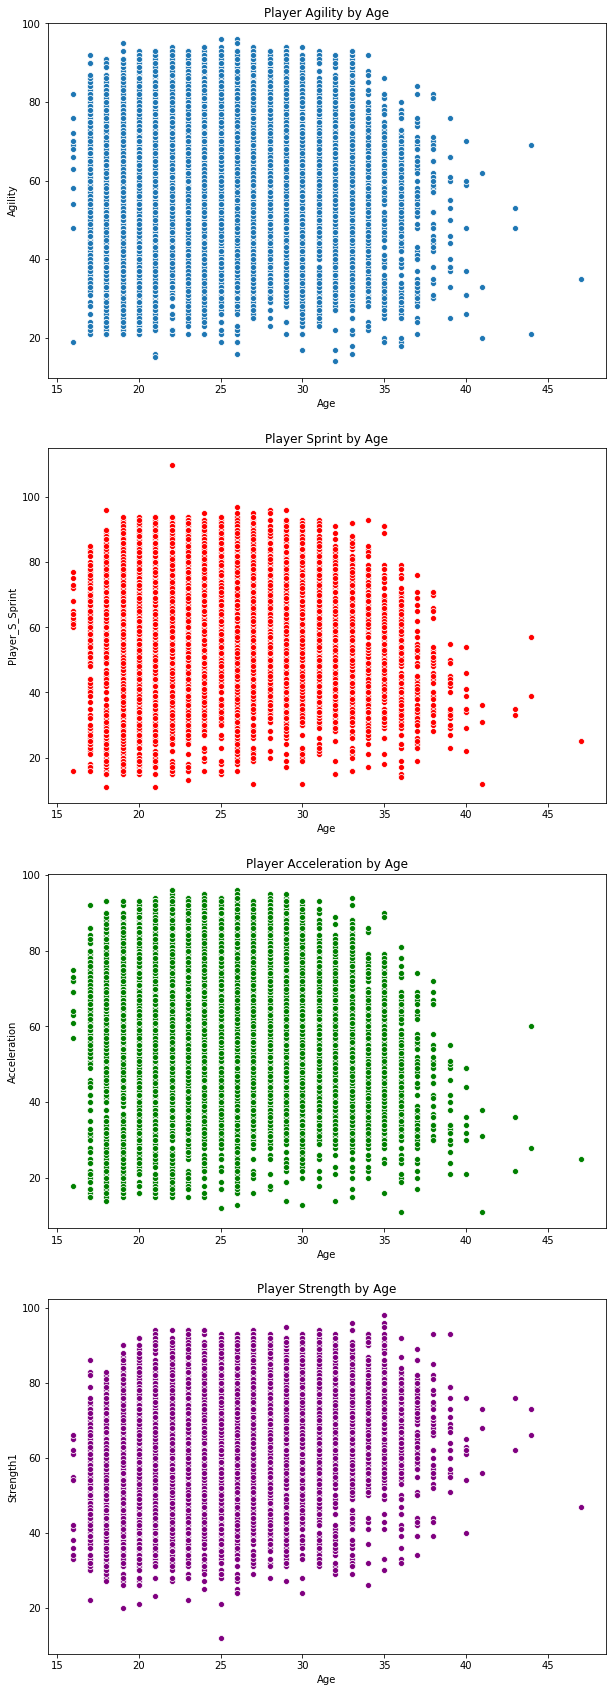

In [44]:
plt.figure(figsize = (10,30),)

plt.subplot(4,1,1)
sns.scatterplot(data = data, x = "Age", y = "Agility" , palette="deep"  )
plt.title("Player Agility by Age")


plt.subplot(4,1,2)
sns.scatterplot(data = data, x = "Age", y = "Player_S_Sprint", color='red')
plt.title("Player Sprint by Age")


plt.subplot(4,1,3)
sns.scatterplot(data = data, x = "Age", y = "Acceleration" , color = 'green')
plt.title("Player Acceleration by Age",)



plt.subplot(4,1,4)
sns.scatterplot(data = data, x = "Age", y = "Strength1" ,  color = 'purple')
plt.title("Player Strength by Age")
plt.show()


### Offensive player that tends to get paid the most


#### Explore the columns that will be needed by checking their unique values

In [45]:
data.Player_Wage.unique()

array([565000., 280000., 510000., 230000., 355000., 215000., 295000.,
       340000., 275000., 310000., 285000., 190000., 265000., 370000.,
       325000., 225000., 110000.,  82000., 150000., 165000., 210000.,
       125000., 175000., 240000., 130000., 195000., 160000., 250000.,
       220000.,  91000., 260000., 205000., 120000., 235000., 135000.,
       115000.,  94000.,  92000.,  77000., 180000.,  46000.,  61000.,
       155000.,  60000., 145000.,  49000.,  81000., 170000., 105000.,
        36000.,  96000.,  39000.,  84000., 200000.,  69000.,  59000.,
        54000.,  68000.,  38000.,  31000.,  53000.,  28000.,  37000.,
        70000.,  78000.,  87000.,  58000.,  75000.,  21000.,  88000.,
        89000.,  18000.,  56000., 140000., 100000.,  45000.,      0.,
        25000.,  66000.,  15000.,  50000.,  27000.,  19000.,  73000.,
        40000.,  65000.,  80000.,  62000.,  47000.,  67000.,  10000.,
        35000.,  98000.,  76000., 185000.,  20000.,  16000.,  43000.,
        85000.,  950

In [46]:
data.ST.unique()

array([92., 88., 84., nan, 82., 77., 87., 72., 81., 83., 76., 86., 59.,
       85., 65., 64., 69., 67., 78., 75., 80., 79., 68., 63., 61., 62.,
       52., 74., 70., 73., 53., 60., 51., 49., 71., 58., 56., 57., 66.,
       55., 54., 50., 48., 46., 44., 47., 45., 41., 39., 40., 42., 43.,
       38., 37., 36., 34., 32., 35., 33., 31.])

In [47]:
data.RW.unique()

array([91., 89., 87., nan, 84., 88., 80., 82., 69., 85., 86., 83., 56.,
       63., 65., 61., 68., 76., 78., 81., 66., 79., 70., 77., 59., 58.,
       45., 71., 75., 55., 72., 48., 49., 62., 60., 51., 74., 57., 67.,
       73., 53., 64., 54., 50., 47., 52., 43., 44., 46., 42., 40., 41.,
       38., 37., 39., 36., 35., 34., 33., 31., 28., 29., 30., 32., 26.])

In [48]:
data.LW.unique()

array([91., 89., 87., nan, 84., 88., 80., 82., 69., 85., 86., 83., 56.,
       63., 65., 61., 68., 76., 78., 81., 66., 79., 70., 77., 59., 58.,
       45., 71., 75., 55., 72., 48., 49., 62., 60., 51., 74., 57., 67.,
       73., 53., 64., 54., 50., 47., 52., 43., 44., 46., 42., 40., 41.,
       38., 37., 39., 36., 35., 34., 33., 31., 28., 29., 30., 32., 26.])

#### Extract player wage, Striker, Right Wing and Left Wing Columns

In [49]:
highest_paid = data[['Player_Wage', 'ST','RW','LW']] # extract the required columns

In [50]:
highest_paid.describe()

Player_Wage            ST            RW            LW
count   17981.000000  15952.000000  15952.000000  15952.000000
mean    11546.966242     58.204050     59.359265     59.359265
std     23080.000139      9.181392      9.978084      9.978084
min         0.000000     31.000000     26.000000     26.000000
25%      2000.000000     52.000000     53.000000     53.000000
50%      4000.000000     59.000000     60.000000     60.000000
75%     12000.000000     65.000000     66.000000     66.000000
max    565000.000000     92.000000     91.000000     91.000000

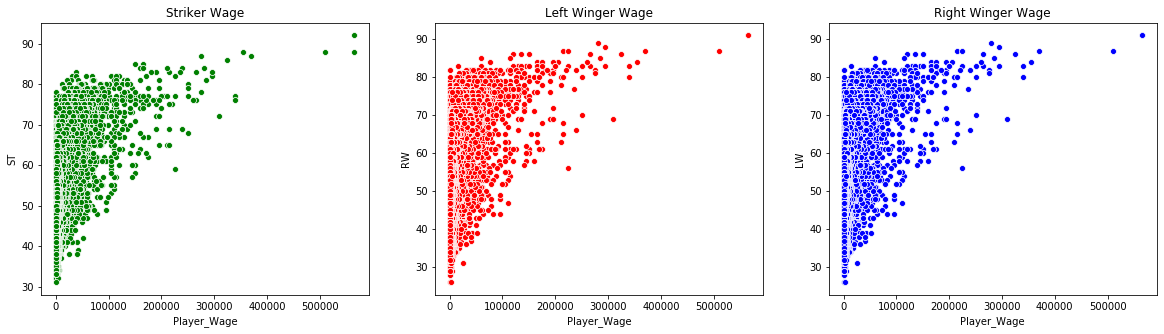

In [51]:
#plot the the data

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(data = highest_paid, x = "Player_Wage", y = "ST" ,color ="green"  )
plt.title("Striker Wage")

plt.subplot(1,3,2)
sns.scatterplot(data = highest_paid, x = "Player_Wage", y = "RW" , color ="red"  )
plt.title("Left Winger Wage")

plt.subplot(1,3,3)
sns.scatterplot(data = highest_paid, x = "Player_Wage", y = "LW" , color ="blue"  )
plt.title("Right Winger Wage")

plt.show()

* From the plot above, it is seen that Strikers get to be paid more as their starting salary is above 30,000 euro
* The highest wage for a striker is 91,000 euro, while others is 90,000


### Top 5 players for every preferred position in terms of overall as well as potential points.

In [52]:
data.Potential.unique()

array([94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 46],
      dtype=int64)

In [53]:
data.Overall.unique()

array([94, 93, 92, 91, 90, 89, 88, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78,
       77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61,
       60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46],
      dtype=int64)

In [54]:
 # filter the data to be used for the analysis by using the group by function to find the player with highest Overall rating and Potential

top5_for_preferred_position = data.groupby(['Name','First_Preferred_Positions']).agg({'Overall' : 'max','Potential': 'max' }).sort_values(ascending = False, by ='Overall')[:5]

In [55]:
top5_for_preferred_position

Overall  Potential
Name              First_Preferred_Positions                    
Cristiano Ronaldo ST                              94         94
L. Messi          RW                              93         93
Neymar            LW                              92         94
L. SuÃ¡rez        ST                              92         92
M. Neuer          GK                              92         92

### Which club(s) has the maximum share of players from England? 

In [56]:
english_players = data[data['Nationality']== 'England']

In [57]:
english_players

Unnamed: 0                   Name  Age  \
46             46                H. Kane   23   
96             96                D. Alli   21   
123           123              G. Cahill   31   
161           161              K. Walker   27   
171           171             A. Lallana   29   
229           229            R. Sterling   22   
232           232                E. Dier   23   
248           248               N. Clyne   26   
261           261           J. Henderson   27   
278           278           D. Sturridge   27   
279           279                D. Rose   26   
286           286              L. Baines   32   
291           291                J. Hart   30   
316           316               J. Vardy   30   
318           318               M. Keane   24   
321           321             J. Butland   24   
331           331             R. Barkley   23   
351           351            C. Smalling   27   
353           353            J. Wilshere   25   
377           377              T. Heaton   31   
387           387              W. Rooney   31   
392           392            M. Rashford   19   
431           431  A. Oxlade-Chamberlain   23   
449           449             M. Antonio   27   
458           458             D. Welbeck   26   
487           487            R. Bertrand   27   
494           494             T. Walcott   28   
496           496              B. Foster   34   
509           509              J. Milner   31   
514           514            P. Jagielka   34   
516           516               J. Defoe   34   
518           518             M. Carrick   35   
557           557                L. Shaw   21   
569           569              J. Stones   23   
598           598               P. Jones   25   
626           626          D. Drinkwater   27   
660           660           R. Shawcross   29   
692           692               G. Barry   36   
746           746             J. Lingard   24   
753           753         J. Ward-Prowse   22   
799           799              C. Austin   27   
803           803            A. Townsend   25   
818           818             J. Lingard   24   
844           844               J. Terry   36   
901           901                S. Dann   30   
907           907            K. Trippier   26   
908           908                J. Cork   28   
918           918                 B. Mee   27   
998           998             N. Redmond   23   
1032         1032          M. Albrighton   27   
1033         1033                A. Gray   26   
1077         1077             L. Britton   34   
1082         1082               F. Delph   27   
1086         1086            J. Pickford   23   
1087         1087          L. Cattermole   29   
1133         1133              A. Lennon   30   
1135         1135             F. Forster   29   
1142         1142              C. Davies   32   
1194         1194             J. Shelvey   25   
1200         1200                S. Cook   26   
1212         1212            S. Sinclair   28   
1214         1214             H. Maguire   24   
1218         1218            S. Berahino   23   
1242         1242                D. Ings   24   
1254         1254           T. Cleverley   27   
1278         1278               M. Noble   30   
1311         1311           J. Rodriguez   27   
1481         1481           A. Cresswell   27   
1513         1513             S. Francis   32   
1523         1523              M. Lowton   28   
1552         1552             J. Tomkins   28   
1612         1612         T. Huddlestone   30   
1646         1646           W. Routledge   32   
1675         1675               L. Moore   24   
1676         1676             G. Johnson   32   
1718         1718            N. Chalobah   22   
1726         1726               A. Young   31   
1776         1776               D. Gayle   26   
1796         1796     B. Wright-Phillips   32   
1799         1799              C. Wilson   25   
1814         1814                N. Dy

In [58]:
clubs_with_english_players = english_players.groupby("Club").agg({"Nationality":"count"}).sort_values(ascending = False, by ="Nationality")[:10]

In [59]:
clubs_with_english_players.rename(columns={"Nationality": "English Nationality"}, inplace=True)

In [60]:
clubs_with_english_players

English Nationality
Club                                  
Bolton Wanderers                    24
Shrewsbury                          24
Chesterfield                        22
Colchester United                   22
Burton Albion                       22
Exeter City                         22
Portsmouth                          22
Port Vale                           22
Mansfield Town                      22
Doncaster Rovers                    21

### Which club(s) has the maximum share of players from Spain?

In [61]:
spanish_players = data[data['Nationality']== 'Spain']
spanish_players.sample(5)

Unnamed: 0             Name  Age  \
13775       13775  Juanpe SÃ¡nchez   21   
10632       10632     Joni Montiel   18   
12460       12460            Rayco   20   
4275         4275          GermÃ¡n   30   
166           166  JosÃ© CallejÃ³n   30   

                                                 Photo Nationality  \
13775  https://cdn.sofifa.org/48/18/players/238887.png       Spain   
10632  https://cdn.sofifa.org/48/18/players/231873.png       Spain   
12460  https://cdn.sofifa.org/48/18/players/240529.png       Spain   
4275   https://cdn.sofifa.org/48/18/players/198230.png       Spain   
166    https://cdn.sofifa.org/48/18/players/185020.png       Spain   

                                      Flag  Overall  Potential  \
13775  https://cdn.sofifa.org/flags/45.png       61         69   
10632  https://cdn.sofifa.org/flags/45.png       65         75   
12460  https://cdn.sofifa.org/flags/45.png       63         73   
4275   https://cdn.sofifa.org/flags/45.png       71         71   
166    https://cdn.sofifa.org/flags/45.png       83         83   

                          Club                                      Club Logo  \
13775       Lorca Deportiva CF    https://cdn.sofifa.org/24/18/teams/2026.png   
10632           Rayo Vallecano     https://cdn.sofifa.org/24/18/teams/480.png   
12460  GimnÃ stic de Tarragona   https://cdn.sofifa.org/24/18/teams/15019.png   
4275                Granada CF  https://cdn.sofifa.org/24/18/teams/110832.png   
166                     Napoli      https://cdn.sofifa.org/24/18/teams/48.png   

       Value Wage  Special  Acceleration  Aggression  Agility  Balance  \
13775   280K   1K      962            32          25       57       23   
10632   800K   2K     1481            61          59       60       68   
12460   600K   2K     1660            69          44       76       60   
4275    1.8M   7K     1598            56          80       47       54   
166    24.5M  87K     1987            90          54       85       81   

      Ball control  Composure  Crossing Curve Dribbling Finishing  \
13775           10         28        14    11        13         5   
10632           68         55        39    41        64        60   
12460           64         62        57    58        61        54   
4275            65         62        42    28        51        40   
166             84         79        77    65        82        76   

      Free kick accuracy GK diving GK handling GK kicking GK positioning  \
13775                 14        60          58         61             61   
10632                 38        10          12         10              9   
12460                 60         9           6          7              8   
4275                  35        14           6          6             11   
166                   65         8           5         14             11   

      GK reflexes Heading accuracy Interceptions Jumping Long passing  \
13775          62               12            14      45           42   
10632           6               45            38      46           69   
12460          10               55            41      62           63   
4275            9               73            65      70           61   
166            11               65            40      73           51   

      Long shots Marking Penalties Positioning Reactions Short passing  \
13775          5       5        11           7        58            45   
10632         62      28        47          64        61            67   
12460         57      45        59          57        54            66   
4275          12      67        38          40        57            72   
166           80      24        62          88        80            75   

      Shot power Sliding tackle Sprint speed Stamina Standing tackle Strength  \
13775         21             12           27      36              12       62   
10632         40             39           57      46              37       37   

In [62]:
clubs_with_spanish_players = spanish_players.groupby("Club").agg({"Nationality":"count"}).sort_values(ascending = False, by ="Nationality")[:10]

In [63]:
clubs_with_spanish_players.rename(columns={"Nationality": "Spain Nationality"}, inplace=True)

In [64]:
clubs_with_spanish_players

Spain Nationality
Club                                      
CA Osasuna                              27
Athletic Club de Bilbao                 26
UD Las Palmas                           25
Lorca Deportiva CF                      25
Real Valladolid                         25
Levante UD                              24
SD Eibar                                24
FC Barcelona B                          24
RCD Espanyol                            24
CD Lugo                                 24

###  Which club(s) have the maximum share of players from Germany?

In [65]:
german_players = data[data['Nationality']== 'Germany']
german_players.sample(5)

Unnamed: 0         Name  Age  \
9452         9452     D. Peitz   32   
4500         4500     A. Luthe   30   
823           823   C. Gentner   31   
13829       13829    M. Gebers   31   
10929       10929  B. Rosinger   27   

                                                 Photo Nationality  \
9452   https://cdn.sofifa.org/48/18/players/189345.png     Germany   
4500   https://cdn.sofifa.org/48/18/players/192665.png     Germany   
823    https://cdn.sofifa.org/48/18/players/158856.png     Germany   
13829  https://cdn.sofifa.org/48/18/players/239417.png     Germany   
10929  https://cdn.sofifa.org/48/18/players/238600.png     Germany   

                                      Flag  Overall  Potential  \
9452   https://cdn.sofifa.org/flags/21.png       66         66   
4500   https://cdn.sofifa.org/flags/21.png       71         71   
823    https://cdn.sofifa.org/flags/21.png       78         78   
13829  https://cdn.sofifa.org/flags/21.png       61         61   
10929  https://cdn.sofifa.org/flags/21.png       64         64   

                     Club                                      Club Logo  \
9452        Holstein Kiel     https://cdn.sofifa.org/24/18/teams/576.png   
4500          FC Augsburg  https://cdn.sofifa.org/24/18/teams/100409.png   
823         VfB Stuttgart      https://cdn.sofifa.org/24/18/teams/36.png   
13829           SV Meppen  https://cdn.sofifa.org/24/18/teams/110597.png   
10929  Sportfreunde Lotte  https://cdn.sofifa.org/24/18/teams/110700.png   

      Value Wage  Special  Acceleration  Aggression  Agility  Balance  \
9452   375K   4K     1531            29          86       30       26   
4500   1.5M  13K     1100            38          22       42       34   
823      9M  29K     2019            48          72       52       49   
13829  170K   1K     1303            62          54       50       52   
10929  475K   1K     1475            70          32       62       62   

      Ball control  Composure  Crossing Curve Dribbling Finishing  \
9452            48         68        37    34        34        42   
4500            14         23        14    15        12        12   
823             77         80        67    69        70        73   
13829           49         57        27    23        26        18   
10929           61         46        53    35        66        67   

      Free kick accuracy GK diving GK handling GK kicking GK positioning  \
9452                  56        13           7         10             10   
4500                  12        74          66         61             71   
823                   54        15          11         16              7   
13829                 21        10           6          7             14   
10929                 29         9          11         13             13   

      GK reflexes Heading accuracy Interceptions Jumping Long passing  \
9452            6               76            68      29           57   
4500           74               15            21      65           19   
823             8               76            77      61           76   
13829          15               61            61      66           45   
10929          13               58            18      70           27   

      Long shots Marking Penalties Positioning Reactions Short passing  \
9452          58      60        48          44        66            59   
4500          16      15        21          12        61            24   
823           77      70        65          74        78            78   
13829         21      61        33          23        52            53   
10929         60      12        58          55        52            44   

      Shot power Sliding tackle Sprint speed Stamina Standing tackle Strength  \
9452          76             65           32      74              74       92   
4500          23             12           50      36              14       74   
823           79             74           50      86       

In [66]:
clubs_with_german_players = german_players.groupby("Club").agg({"Nationality":"count"}).sort_values(ascending = False, by ="Nationality")[:10]

In [67]:
clubs_with_german_players.rename(columns={"Nationality": "German Nationality"}, inplace=True)

In [68]:
clubs_with_german_players

German Nationality
Club                                    
Holstein Kiel                         26
 SSV Jahn Regensburg                  23
SV Meppen                             23
FSV Zwickau                           23
1. FC Magdeburg                       23
Hallescher FC                         23
FC Carl Zeiss Jena                    23
SpVgg Unterhaching                    23
Karlsruher SC                         23
Chemnitzer FC                         23

### Comparing the 5 national teams

In [69]:
#filter out the dataset of competing nationalities
competing_nationalities = data[(data.Nationality == "France") | (data.Nationality== "England") |
                              (data.Nationality == "Spain") | (data.Nationality == "Italy") | 
                              (data.Nationality == "Germany") & (data.Overall > 75)]

In [70]:
competing_nationalities.sample(5)

Unnamed: 0             Name  Age  \
12016       12016         J. Byrom   30   
4639         4639         T. Mings   24   
2638         2638        G. Friend   29   
460           460  Mikel San JosÃ©   28   
15134       15134       N. Kabamba   24   

                                                 Photo Nationality  \
12016  https://cdn.sofifa.org/48/18/players/169489.png     England   
4639   https://cdn.sofifa.org/48/18/players/212419.png     England   
2638   https://cdn.sofifa.org/48/18/players/188168.png     England   
460    https://cdn.sofifa.org/48/18/players/185132.png       Spain   
15134  https://cdn.sofifa.org/48/18/players/237355.png     England   

                                      Flag  Overall  Potential  \
12016  https://cdn.sofifa.org/flags/14.png       63         63   
4639   https://cdn.sofifa.org/flags/14.png       71         78   
2638   https://cdn.sofifa.org/flags/14.png       73         73   
460    https://cdn.sofifa.org/flags/45.png       80         80   
15134  https://cdn.sofifa.org/flags/14.png       59         66   

                          Club                                    Club Logo  \
12016           Mansfield Town  https://cdn.sofifa.org/24/18/teams/1940.png   
4639               Bournemouth  https://cdn.sofifa.org/24/18/teams/1943.png   
2638             Middlesbrough    https://cdn.sofifa.org/24/18/teams/12.png   
460    Athletic Club de Bilbao   https://cdn.sofifa.org/24/18/teams/448.png   
15134        Colchester United  https://cdn.sofifa.org/24/18/teams/1935.png   

       Value Wage  Special  Acceleration  Aggression  Agility  Balance  \
12016   350K   4K     1680            52          50       58       59   
4639    2.8M  31K     1710            73          73       64       54   
2638      3M  18K     1889            74          62       71       50   
460    14.5M  33K     1946            38          74       47       55   
15134   220K   2K     1342            75          45       62       50   

      Ball control  Composure  Crossing Curve Dribbling Finishing  \
12016           63         61        60    65        54        52   
4639            65         59        70    45        69        35   
2638            69         62        66    67        74        52   
460             79         70        47    31        70        69   
15134           46         41        26    34        44        60   

      Free kick accuracy GK diving GK handling GK kicking GK positioning  \
12016                 65        12           7         10              9   
4639                  37         7          10         13              7   
2638                  57        11          13         15              6   
460                   44        10           6         10              8   
15134                 26        10          12          5              8   

      GK reflexes Heading accuracy Interceptions Jumping Long passing  \
12016           6               46            46      73           64   
4639           15               63            70      64           59   
2638           12               68            70      73           59   
460            16               82            83      77           82   
15134          10               62            12      66           25   

      Long shots Marking Penalties Positioning Reactions Short passing  \
12016         66      47        64          60        56            66   
4639          30      68        32          57        67            65   
2638          58      73        50          64        65            68   
460           78      72        51          70        82            83   
15134         56      13        45          54        42            50   

      Shot power Sliding tackle Sprint speed Stamina Standing tackle Strength  \
12016         63             48           51      73              51       71   
4639          41             70           75      77              71       80   
2638       

In [71]:
competing_nationalities.Nationality.unique()

array(['Germany', 'Spain', 'Italy', 'France', 'England'], dtype=object)

### RECOMMENDATIONS
* England , Spain and Germany have  more focused in producing players. France should invest more in growing home talent
Coach should under study the criteria and method via which the above countries are able to recruit  and train
Players in their late twenties perform optimally ideally between 26 and 28   and should be the coache’s target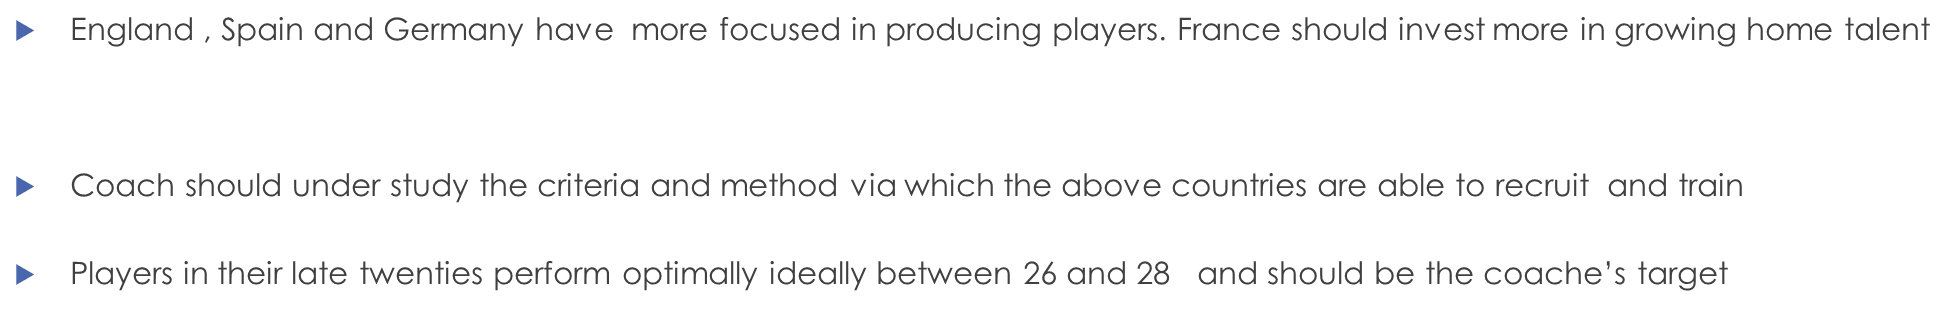